## ESERCIZIO W15D5

### Il dataset insurance.csv
* Visualizziamone le dimensioni, un'anteprima, e osserviamo i nomi di colonna;
*  Quali sono le medie di charges rispetto a region? Ci sono differenze significative?
*  E rispetto a smoker? E a sex?
*  Quali sono i descrittori statistici di bmi? Quali sono minimo, media e massimo di charges rispetto ai diversi quartili dei valori di bmi? Nota: è lo stesso esercizio della volta scorsa, ma stavolta da eseguire con il 

In [1]:
import pandas as pd

In [3]:
file_path = "beginner_datasets/insurance.csv"
insurance = pd.read_csv(file_path)

In [5]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
insurance.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [19]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
desc_bmi = insurance.bmi.describe()
desc_bmi

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [39]:
filtro_bmi_1 = (desc_bmi.loc["min"] <= insurance.bmi) &  (insurance.bmi < desc_bmi["25%"])
ins_1 = insurance.loc[filtro_bmi_1]
ins_1.charges.mean()

10360.662825492538

In [43]:
filtro_bmi_2 = (desc_bmi.loc["25%"] <= insurance.bmi) &  (insurance.bmi < desc_bmi["50%"])
ins_2 = insurance.loc[filtro_bmi_2]
ins_2.charges.mean()

11398.362224261262

In [45]:
filtro_bmi_3 = (desc_bmi.loc["50%"] <= insurance.bmi) &  (insurance.bmi < desc_bmi["75%"])
ins_3 = insurance.loc[filtro_bmi_3]
ins_3.charges.mean()

14323.550841999999

In [47]:
filtro_bmi_4 = (desc_bmi.loc["75%"] <= insurance.bmi) &  (insurance.bmi < desc_bmi["max"])
ins_4 = insurance.loc[filtro_bmi_4]
ins_4.charges.mean()

17035.315355598803

In [30]:
import pandas as pd
import seaborn as sas

In [8]:
file_path = "beginner_datasets/boston.csv"
boston = pd.read_csv(file_path)

In [10]:
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [14]:
boston.groupby("chas")["medv"].mean()

chas
0    22.093843
1    28.440000
Name: medv, dtype: float64

In [18]:
boston.groupby("crim")["medv"].mean().sort_index()

crim
0.00632     24.0
0.00906     32.2
0.01096     22.0
0.01301     32.7
0.01311     35.4
            ... 
45.74610     7.0
51.13580    15.0
67.92080     5.0
73.53410     8.8
88.97620    10.4
Name: medv, Length: 504, dtype: float64

In [20]:
boston.groupby("ptratio")["rm"].mean()

ptratio
12.6    7.222667
13.0    7.406167
13.6    7.923000
14.4    7.875000
14.7    6.246235
14.8    6.752333
14.9    7.311250
15.1    6.816000
15.2    6.421923
15.3    6.705333
15.5    7.241000
15.6    6.702000
15.9    6.997000
16.0    6.230600
16.1    6.428800
16.4    6.139667
16.6    6.344188
16.8    6.146750
16.9    6.016400
17.0    6.868250
17.3    6.383000
17.4    7.212333
17.6    6.822429
17.8    6.496130
17.9    6.134818
18.0    7.218600
18.2    6.283000
18.3    6.520500
18.4    6.285938
18.5    6.288750
18.6    6.111588
18.7    6.406556
18.8    5.956000
18.9    5.785667
19.0    6.453750
19.1    6.234882
19.2    6.053632
19.6    6.224000
19.7    6.303250
20.1    5.585400
20.2    6.024021
20.9    6.266273
21.0    6.039778
21.1    5.888000
21.2    6.028533
22.0    5.799500
Name: rm, dtype: float64

In [24]:
boston.groupby("medv")["rm"].mean()

medv
5.0     5.5680
5.6     5.9870
6.3     5.8520
7.0     4.9665
7.2     6.0180
         ...  
46.7    7.6860
48.3    8.2470
48.5    7.8530
48.8    8.3980
50.0    7.4840
Name: rm, Length: 229, dtype: float64

In [36]:
boston.groupby("rad")["age"].mean()

rad
1     45.025000
2     64.770833
3     49.310526
4     60.841818
5     69.223478
6     60.142308
7     40.141176
8     67.350000
24    89.805303
Name: age, dtype: float64

In [40]:
boston.groupby("rad")["rm"].mean()

rad
1     6.555850
2     6.649958
3     6.473026
4     6.133118
5     6.393157
6     6.104731
7     6.647765
8     6.950792
24    6.022152
Name: rm, dtype: float64

In [42]:
boston.groupby("rad")["tax"].mean()

rad
1     291.450000
2     260.666667
3     246.078947
4     335.981818
5     331.843478
6     372.884615
7     304.411765
8     301.250000
24    666.000000
Name: tax, dtype: float64

<Axes: xlabel='rad'>

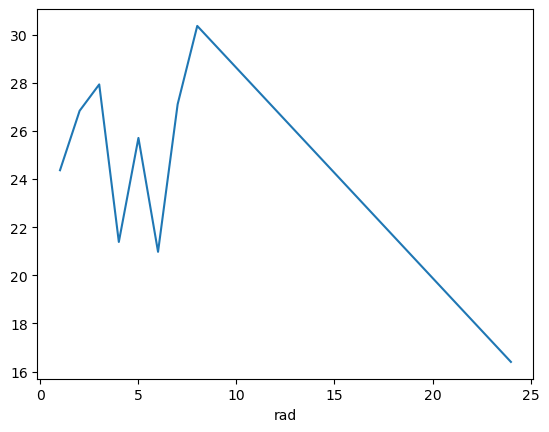

In [52]:
boston.groupby("rad").medv.mean().plot()

<Axes: xlabel='rad'>

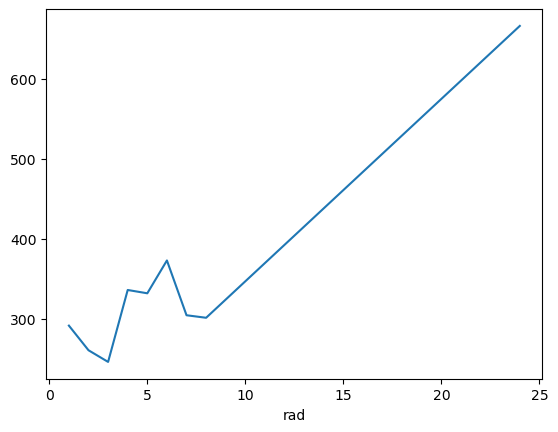

In [54]:
boston.groupby("rad").tax.mean().plot()

In [56]:
employees_df = pd.DataFrame({ 'employee_id': [101, 102, 103, 104, 105],
                             'name': ['Alice', 'Bob', 'Charlie', 'David',
                                      'Emma'], 'department_id': [1, 2, 1, 2, 3] })

In [58]:
departments_df = pd.DataFrame({ 'department_id': [1, 2, 3], 'department_name':
                               ['HR', 'IT', 'Finance'], 'location':
                               ['New York', 'San Francisco', 'Chicago'] })

In [95]:
employees_df.merge(departments_df,how = "inner",on="department_id")

,department_id,employee_id,name,department_name,location
0,1,101,Alice,HR,New York
1,1,103,Charlie,HR,New York
2,2,102,Bob,IT,San Francisco
3,2,104,David,IT,San Francisco
4,3,105,Emma,Finance,Chicago


In [80]:
pip install PyMySQL

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [82]:
pip install PyMySQL

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [84]:
pip install python_dotenv

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [108]:
import os
import dotenv
import pandas as pd
from sqlalchemy import create_engine

dotenv.load_dotenv(dotenv_path=".env", override=True)

username = os.getenv("username")
password = os.getenv("password")
host = os.getenv("host")
dbname = os.getenv("dbname")

dotenv.load_dotenv(override=True)
conn_string = "mysql+pymysql://" + username + ":" + password + "@" + host + "/" + dbname
db_engine = create_engine(conn_string)

In [110]:
query = "SELECT * FROM dimemployee"
employee = pd.read_sql(sql=query, con=db_engine)

In [114]:
query = "SELECT * FROM dimemployeesalesterritory"
salesterritory = pd.read_sql(sql=query, con=db_engine)

In [116]:
employee.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,Gender,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position
0,1,18.0,14417807,446466105.0,Guy,Gilbert,R,0,Production Technician - WC60,2006-01-28,...,M,1,12.4500,21,30,1,0,Production,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
1,2,7.0,253022876,24756624.0,Kevin,Brown,F,0,Marketing Assistant,2006-08-26,...,M,2,13.4615,42,41,1,0,Marketing,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
2,3,14.0,509647174,245797967.0,Roberto,Tamburello,None,0,Engineering Manager,2007-06-11,...,M,2,43.2692,2,21,1,0,Engineering,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
3,4,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None
4,5,3.0,112457891,509647174.0,Rob,Walters,None,0,Senior Tool Designer,2007-07-05,...,M,2,29.8462,48,80,1,0,Tool Design,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,None


In [118]:
salesterritory.head()

,EmployeeKey,SalesTerritoryKey
0,272,1
1,277,1
2,286,1
3,289,1
4,293,1


In [120]:
est = pd.merge(left=employee , right=salesterritory, on="EmployeeKey") 

In [122]:
est.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,PayFrequency,BaseRate,VacationHours,SickLeaveHours,CurrentFlag,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1
1,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,2
2,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,3
3,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,4
4,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,2,48.101,14,27,1,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,5


In [126]:
employee.shape

(296, 28)

In [128]:
est.shape

(39, 29)

In [132]:
employee.EmployeeKey.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [134]:
salesterritory.EmployeeKey.unique()

array([272, 277, 286, 289, 293, 281, 282, 283, 287, 285, 284, 288, 290,
       291, 292, 295, 294, 296], dtype=int64)

In [136]:
query = "SELECT * FROM dimsalesterritory"
territories =  pd.read_sql(sql=query, con=db_engine)

In [138]:
territories.head()

,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,2,2,Northeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,3,3,Central,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,4,4,Southwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,5,5,Southeast,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [140]:
eat = pd.merge(left=est , right=territories, on="SalesTerritoryKey")

In [144]:
eat.shape

(39, 34)

In [146]:
eat.head()

,EmployeeKey,ParentEmployeeKey,EmployeeNationalIDAlternateKey,ParentEmployeeNationalIDAlternateKey,FirstName,LastName,MiddleName,NameStyle,Title,HireDate,...,SalesPersonFlag,DepartmentName,EmployeePhoto,Position,SalesTerritoryKey,SalesTerritoryAlternateKey,SalesTerritoryRegion,SalesTerritoryCountry,SalesTerritoryGroup,SalesTerritoryImage
0,272,277.0,502097814,112432117.0,Stephen,Jiang,Y,0,North American Sales Manager,2010-08-04,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Manager,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
1,277,277.0,112432117,112432117.0,Brian,Welcker,S,0,Director of Sales,2010-09-15,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Director,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
2,286,272.0,61161660,502097814.0,Pamela,Ansman-Wolfe,O,0,Sales Representative,2010-12-29,...,1,Sales,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
3,289,272.0,987554265,502097814.0,David,Campbell,R,0,Sales Representative,2010-12-29,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...
4,293,272.0,90836195,502097814.0,Tete,Mensa-Annan,A,0,Sales Representative,2012-04-30,...,1,Sales,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...,Sales Representative,1,1,Northwest,United States,North America,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...


In [148]:
eat.groupby("SalesTerritoryRegion").FirstName.count()

SalesTerritoryRegion
Australia         3
Canada            4
Central           5
France            4
Germany           3
Northeast         3
Northwest         5
Southeast         4
Southwest         5
United Kingdom    3
Name: FirstName, dtype: int64

In [150]:
eat.groupby("SalesTerritoryCountry").FirstName.count()

SalesTerritoryCountry
Australia          3
Canada             4
France             4
Germany            3
United Kingdom     3
United States     22
Name: FirstName, dtype: int64

In [152]:
eat.groupby("SalesTerritoryCountry").BaseRate.mean()

SalesTerritoryCountry
Australia         47.764433
Canada            41.592550
France            41.592550
Germany           47.764433
United Kingdom    47.764433
United States     39.909309
Name: BaseRate, dtype: float64